In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier

basePre = pd.read_csv('./bases/base_pre.csv')
baseScaled = pd.read_csv('./bases/base_scaled.csv')
basePCACompleta = pd.read_csv('./bases/base_train_completa.csv')
basePCAInversa = pd.read_csv('./bases/base_train_correlacao_inversa.csv')
basePCAProporcional = pd.read_csv('./bases/base_train_correlacao_proporcional.csv')
basePca70 = pd.read_csv('./bases/base_train_70.csv')
basePca50 = pd.read_csv('./bases/base_train_50.csv')

cv = 5

clusters = 2
init = 'k-means++'
maxIter = 300
nInit = 10
rs = 0


color1='#32CD32'
color2='#FF6347'
color3='#00008B'

SINGLE EXECUTION

Applying in baseScaled

In [95]:
Y = basePre['target']

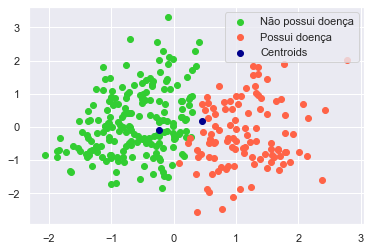

In [96]:
data = baseScaled

kmeans = KMeans(n_clusters=clusters, random_state=rs)

y_kmeans = kmeans.fit_predict(data)

pca=PCA(n_components=2, whiten=True)
data = pca.fit_transform(baseScaled.values)

plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], c=color1, label="Não possui doença")
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], c=color2, label="Possui doença")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c=color3, label='Centroids')

plt.legend()
plt.savefig('baseScaled.png')

In [97]:
sc = cross_val_score(kmeans, baseScaled, y_kmeans, cv=cv)

In [98]:
accArray = np.array([[sc.mean(), sc.std()*2]])

Applying in basePCAInversa

No handles with labels found to put in legend.


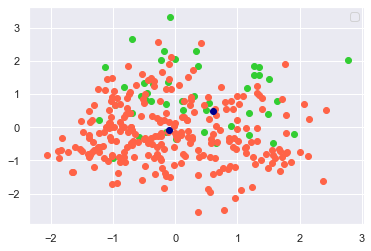

In [99]:
data = basePCAInversa

kmeans = KMeans(n_clusters=clusters, random_state=rs)

y_kmeans = kmeans.fit_predict(data)

pca=PCA(n_components=2, whiten=True)
data = pca.fit_transform(baseScaled.values)

plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], c=color1)
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], c=color2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c=color3)

plt.legend()
plt.savefig('basePCAInversa.png')

In [100]:
sc = cross_val_score(kmeans, basePCAInversa, y_kmeans, cv=cv)

In [101]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

Applying in basePCAProporcional

No handles with labels found to put in legend.


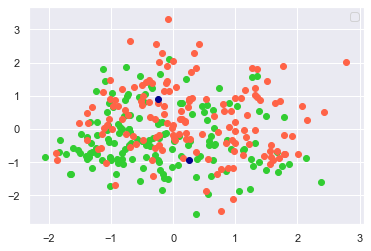

In [102]:
data = basePCAProporcional

kmeans = KMeans(n_clusters=clusters, random_state=rs)

y_kmeans = kmeans.fit_predict(data)

pca=PCA(n_components=2, whiten=True)
data = pca.fit_transform(baseScaled.values)

plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], c=color1)
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], c=color2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c=color3)

plt.legend()
plt.savefig('basePCAProporcional.png')

In [103]:
sc = cross_val_score(kmeans, basePCAProporcional, y_kmeans, cv=cv)

In [104]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA  com 70%

No handles with labels found to put in legend.


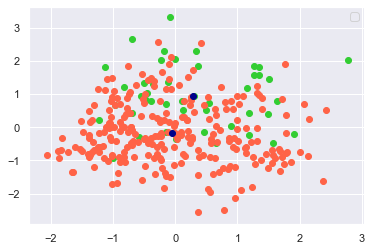

In [105]:
data = basePca70

kmeans = KMeans(n_clusters=clusters, random_state=rs)

y_kmeans = kmeans.fit_predict(data)

pca=PCA(n_components=2, whiten=True)
data = pca.fit_transform(baseScaled.values)

plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], c=color1)
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], c=color2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c=color3)

plt.legend()
plt.savefig('basePca70.png')

In [106]:
sc = cross_val_score(kmeans, basePca70, y_kmeans, cv=cv)

In [107]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA com 50%

No handles with labels found to put in legend.


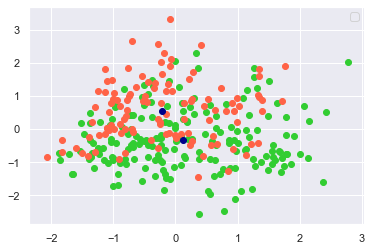

In [108]:
data = basePca50

kmeans = KMeans(n_clusters=clusters, random_state=rs)

y_kmeans = kmeans.fit_predict(data)

pca=PCA(n_components=2, whiten=True)
data = pca.fit_transform(baseScaled.values)

plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], c=color1)
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], c=color2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c=color3)

plt.legend()
plt.savefig('basePca50.png')

In [109]:
sc = cross_val_score(kmeans, basePca50, y_kmeans, cv=cv)

In [110]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [111]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [112]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,-67852.0,5991.0
1,-49610.0,6025.0
2,-18601.0,1848.0
3,-49740.0,5032.0
4,-32909.0,2835.0


BAGGING com a melhor single

In [113]:
data = baseScaled

y_kmeans = kmeans.fit_predict(data)

kmeans = KMeans(n_clusters=clusters, random_state=rs)

model = BaggingClassifier(kmeans, n_estimators=5, random_state=0)

sc = cross_val_score(model, data, y_kmeans, cv=cv)

In [114]:
accArray = np.array([[sc.mean(), sc.std()*2]])

In [115]:
model = BaggingClassifier(kmeans, n_estimators=10, random_state=0)

sc = cross_val_score(model, data, y_kmeans, cv=cv)

In [116]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [117]:
model = BaggingClassifier(kmeans, n_estimators=20, random_state=0)

sc = cross_val_score(model, data, y_kmeans, cv=cv)

In [118]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [119]:
model = BaggingClassifier(kmeans, n_estimators=30, random_state=0)

sc = cross_val_score(model, data, y_kmeans, cv=cv)

In [120]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [121]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [122]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,79.0,72.0
1,65.0,67.0
2,64.0,5.0
3,41.0,69.0
